                                Project2 find data and analyze the problem
                                            Spring
                                    completed by Zeyu Wang

# 1. Introduction 


The data is about the recent earthquake data across the world. Analysis of these data, I would like to know more detail about the earthquake around our life. For example, I can know which country suffers from the earthquake most frequently? What is the grade of most of the recent earthquakes? What is the depth of most earthquakes recently?


In [347]:
import urllib3
import lxml.etree as etree
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# 2. Data Summary

The data used in this project is the recent earthquake data across the world. To get the newest data, I use Python reptile to get the data from the internet. Avoid to violent the law in the US,
I decide to get the data from the Chinese website http://www.ceic.ac.cn/speedsearch?time=8&&page=1.
The data set will include the area name, grade, date, latitude, longitude, and depth. It is totally 6 attributes in each use case. The area name is the string and it also is categorical/regular. Grade and depth are float and numeric/continuous. Latitude and longitude are float and numeric/continuous. The date is time and categorical/ordinal. Because the data is from Chinese data, I will use the translator to translate them from Chinese to English. But due to the vocabulary library in the translated website, some area names can’t be translated well and I keep them in Chinese. Luckily, most of the data can be changed normally by the translator.
When I run the code and write this document, there are 580 use cases my data set provides. But because the data is real-time, its number of data will change when you run it again if there is a new earthquake appear.


set the data sources

In [176]:
targethttps = 'http://www.ceic.ac.cn/speedsearch?time=8&&page=1'#terget page
datazuzu=[[]]
datanamename=[]
global ii
ii = 0

# 3. Data Management using PostgreSQL

### 3.1 Create a fully normalized SQL database schema for the data you’ve chosen to work with.

In this part, a database that including two tables was created. One table named "EarthEvent" includes the earthquake event id and area name of the earthquake. Of course, the earthquake event id is the primary key. The other table named "EarthInfo" is including 6 attributes such as earthquake event id, grade, date, latitude, longitude and depth. The earthquake event id in the second table is the foreign key reference to the earthquake event id in the first table.

### 3.2Create an ER diagram for your proposed schema.

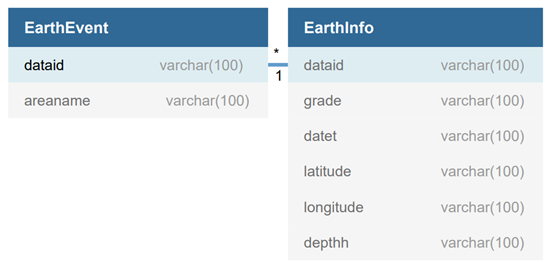

### 3.3 Formulate SQL statements that will create your proposed database and tables within PostgreSQL, including any required primary and foreign keys.

Create database:
CREATE DATABASE “earthdata”;
Create table1:
CREATE TABLE "EarthEvent"(
"dataid" varchar(100) primary key,
"areaname" varchar(100)
);
Create table2:
CREATE TABLE "EarthInfo"(
"dataid" varchar(100) references "EarthEvent"("dataid"),
"grade" varchar(100),
"datet" varchar(100),
"latitude" varchar(100),	
"longitude" varchar(100),
"depthh" varchar(100)
);


### 3.4 Open your PostgreSQL SQL terminal and execute the SQL statements you have written to create your proposed database within your PostgreSQL. Do not populate the tables you have created with data from your data set as part of this step!!

In this step, one database and two tables were successfully created.

### 3.5 Connect to your PostgreSQL server from within your Jupyter Notebook environment and use your knowledge of Python, Pandas, and SQL to load your data set into your new PostgreSQL database. Be sure to include a query that verifies the successful execution of your SQL statements.

First of all, we need to import the library psycopg2 for connecting the database. We use the script: import psycopg2. Then, we use ‘conn = psycopg2.connect(database='earthdata', user='postgres', password='woshi110', host='127.0.0.1',port="5432")’ to connect the database. In this step, if we put the database on the remote server, we can change the host to your remote server’s IP. Furthermore, we create the cursor by ‘cursor = conn.cursor()’. Finally, we execute the SQL scrip and commit the scrip in Jupiter by ‘cursor = conn.cursor()’. Finally, we excute the sql scrip and commit the scrip in jupyter by ‘cursor.execute('insert into "EarthEvent" ("dataid", "areaname") values (%s,%s)', [ii,dataareaname[i]])
        cursor.execute('insert into "EarthInfo" ("dataid", "grade", "datet", "latitude", "longitude", "depthh") values (%s,%s,%s,%s,%s,%s)', [ii, datazu[j],datazu[j+1],datazu[j+2],datazu[j+3],datazu[j+4]])
        conn.commit()’.


clean the data of the database because the same data will be inserted into a database for each run and repeat data is unnecessary.

In [177]:
def ClearusePostgresql():
    conn = psycopg2.connect(database='earthdata', user='postgres', password='woshi110', host='127.0.0.1',port="5432")
    cursor = conn.cursor()
    print("22222222222222")
    cursor.execute('truncate table "EarthEvent" CASCADE')
    cursor.execute('truncate table "EarthInfo"')
    conn.commit()
    cursor.close()

usePostgresql(): Connect the database and insert the data in it. The first parameter is the data which need to insert into database and the second one is the list of area name of the earthquake.

In [178]:
def usePostgresql(datazu, dataareaname):
    global ii
    conn = psycopg2.connect(database='earthdata', user='postgres', password='woshi110', host='127.0.0.1',port="5432")
    cursor = conn.cursor()  
    print('11111111111')
    j = 0
    for i in range(len(dataareaname)):
        cursor.execute('insert into "EarthEvent" ("dataid", "areaname") values (%s,%s)', [ii,dataareaname[i]])
        cursor.execute('insert into "EarthInfo" ("dataid", "grade", "datet", "latitude", "longitude", "depthh") values (%s,%s,%s,%s,%s,%s)', [ii, datazu[j],datazu[j+1],datazu[j+2],datazu[j+3],datazu[j+4]])
        conn.commit()
        ii+=1
        j+=5
    cursor.close()

### 3.6 read the data from postgresql‘cursor.execute('select ee."dataid", ee."areaname", ei."grade", ei."datet", ei."latitude", ei."longitude", ei."depthh" from "EarthEvent"as ee left join "EarthInfo" as ei on ee."dataid" = ei."dataid"')’We use this two table to join and get the data what we need.


getDataPostgresql(): this method will get the data from the database. Finally, it will return the data about the earthquake event is,
grade, date, latitude, longitude, and depth. The return is the list.

In [203]:
def getDataPostgresql():
    conn = psycopg2.connect(database='earthdata', user='postgres', password='woshi110', host='127.0.0.1',port="5432")
    cursor = conn.cursor()  
    cursor.execute('select ee."dataid", ee."areaname", ei."grade", ei."datet", ei."latitude", ei."longitude", ei."depthh" from "EarthEvent"as ee left join "EarthInfo" as ei on ee."dataid" = ei."dataid"')
    data = cursor.fetchall()
    cursor.close()
    return data

This function will analyze the data in XML data which is getting from the earthquake. This function will extract the data to meet XPath and return it.

In [179]:
def catchInfo(data, xpath):
    content = etree.HTML(data)
    info = content.xpath(xpath)

    return(info)

This function will get the page number from the website. Because one page has less data, we need to get more data by more pages.

In [180]:
def getPageNum(url):
    http = urllib3.PoolManager()
    response = http.request('GET', url)
    data = response.data.decode('utf-8')
    pagenum = catchInfo(data, '//p[@class="pagenum"]/text()')
    pgn = pagenum[0][-2:]
    return int(pgn)

Get data from the URL and then transit it to catch info() to extract the data.

In [214]:
def getData(url, kk):
    http = urllib3.PoolManager()
    response = http.request('GET', url)
    data = response.data.decode('utf-8')
    datazu = catchInfo(data,'//td[@align="center"]/text()')
    dataareaname = catchInfo(data,'//td[@align="left"]/a/text()')
    datazuzu.append(datazu[kk])
    datanamename.append(dataareaname)
    usePostgresql(datazu, dataareaname)

This function is to extract the data from the translated website. We can get the translated result from the return of this function.

In [313]:
def getTranslateData(url, xpath):
    http = urllib3.PoolManager()
    response = http.request('GET', url)
    data = response.data.decode('utf-8')
    datazu = catchInfo(data, xpath)
    return(datazu)

This function will splice the URL for getting data and it will show 29 lines '11111111111' to show the process of getting data.

In [380]:
'''
Transit the url into getPageNum and then transit the page number and url into getData()
and getData() function will use catchInfo() function to extrcat the information. 
'''
ClearusePostgresql()
pn = getPageNum("http://www.ceic.ac.cn/speedsearch?time=8&&page=1")
kk=0
for i in range(pn):
    getData("http://www.ceic.ac.cn/speedsearch?time=8&&page="+str(i), kk)
    kk += 1

22222222222222
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111
11111111111


Show the data which get from the database.

In [315]:
data = getDataPostgresql()
print(data)

[('0', '新西兰克马德克群岛', '6.2', '2021-03-06 21:12:05', '-28.05', '-177.75', '10'), ('1', '新西兰克马德克群岛', '6.1', '2021-03-06 20:05:21', '-27.90', '-177.70', '10'), ('2', '新西兰克马德克群岛', '6.1', '2021-03-06 18:34:50', '-28.12', '-177.69', '10'), ('3', '新西兰北岛海域', '6.4', '2021-03-06 08:16:20', '-37.66', '179.55', '10'), ('4', '新西兰克马德克群岛', '6.3', '2021-03-05 22:24:50', '-29.10', '-176.45', '10'), ('5', '新西兰克马德克群岛', '5.8', '2021-03-05 16:13:43', '-29.45', '-176.34', '10'), ('6', '印尼苏门答腊岛南部海域', '5.6', '2021-03-05 15:32:53', '-1.85', '99.05', '20'), ('7', '新西兰克马德克群岛', '6.0', '2021-03-05 10:30:34', '-28.84', '-176.32', '10'), ('8', '新西兰克马德克群岛海域', '6.2', '2021-03-05 08:28:20', '-29.09', '-176.20', '10'), ('9', '新西兰克马德克群岛', '6.7', '2021-03-05 07:12:55', '-28.53', '-176.36', '10'), ('10', '新西兰克马德克群岛', '7.8', '2021-03-05 03:28:32', '-29.51', '-177.04', '10'), ('11', '希腊', '5.6', '2021-03-05 03:23:54', '39.81', '21.92', '10'), ('12', '希腊', '6.1', '2021-03-05 02:38:20', '39.78', '22.10', '10'), ('13', '西藏阿里地区日土县

Translate the Chinese data to English.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Notices that this function needs 30 minutes to run out.

In [317]:

index = []
areaname = []
areanameEn = []
grade = []
date = []
latitude = []
longitude = []
depthh = []
for i in data:
    index.append(i[0])
    areaname.append(i[1])
    grade.append(i[2])
    date.append(i[3])
    latitude.append(i[4])
    longitude.append(i[5])
    depthh.append(i[6])
xpath1 = '//div[@id="fanyiToggle"]/div/p[2]/text()'
xpath2 = '//p[@class="wordGroup"]/span/a/text()'
for i in areaname:#change name form Chinese to English
    name = ''.join(getTranslateData("https://www.youdao.com/w/eng/"+i+"/#keyfrom=dict2.index", xpath1))
    if len(name) == 0:# The website has two type website to translate and maybe the result will be null.
        name2 = getTranslateData("https://www.youdao.com/w/eng/"+i+"/#keyfrom=dict2.index", xpath2)# we need to run the second type code to get the data from the second type website.
        if len(name2)!=0: # If the seconds result if not null, it means that we get the data.
            areanameEn.append(name2[0])
            print(name2[0])
        else:#otherwise, the translate run into some problem and we keep the Chinese result.
            areanameEn.append(i)
            print(i)
    else:
        areanameEn.append(name)
        print(name)
print(areanameEn)


Kermadec Islands, New Zealand
Kermadec Islands, New Zealand
Kermadec Islands, New Zealand
Off North Island, New Zealand
Kermadec Islands, New Zealand
Kermadec Islands, New Zealand
Off the southern coast of Sumatra, Indonesia
Kermadec Islands, New Zealand
Off the Kermadec Islands, New Zealand
Kermadec Islands, New Zealand
Kermadec Islands, New Zealand
Greece
Greece
Ritu County, Ali Prefecture, Tibet
Kermadec Islands, New Zealand
Vanuatu Islands
Sea area of Taiwan Yilan County
Off North Island, New Zealand
Greece
Kuril Islands
Kermadec Islands, New Zealand
Kermadec Islands, New Zealand
Kermadec Islands, New Zealand
Off North Island, New Zealand
Kermadec Islands, New Zealand
Kermadec Islands, New Zealand
Off the southern coast of Sumatra, Indonesia
Kermadec Islands, New Zealand
Off the Kermadec Islands, New Zealand
Kermadec Islands, New Zealand
Kermadec Islands, New Zealand
Greece
Greece
Ritu County, Ali Prefecture, Tibet
Kermadec Islands, New Zealand
Vanuatu Islands
Sea area of Taiwan Yi

### 4. Exploratory Data Analysis (EDA)After we get the data from the database and use the python network crawler to translate the data of area name. We put our data into DataFrame. Because of many reasons such the network delay, big data set, the performance speed of python and so on. Translate is a very time-consuming action. It needs more than 30 minutes.df = pd.DataFrame({'areaname':areanameEn, 'grade':grade, 'date':date, 'latitude':latitude, 'longitude':longitude,'depth':depthh},index = index)
we use the data to set DataFrame and indicate the index for it. Then we get the result of DataFrame.


Show the DataFrame form.

In [318]:
df = pd.DataFrame({'areaname':areanameEn, 'grade':grade, 'date':date, 'latitude':latitude, 'longitude':longitude,'depth':depthh},index = index)
df  

,areaname,grade,date,latitude,longitude,depth
0,"Kermadec Islands, New Zealand",6.2,2021-03-06 21:12:05,-28.05,-177.75,10
1,"Kermadec Islands, New Zealand",6.1,2021-03-06 20:05:21,-27.90,-177.70,10
2,"Kermadec Islands, New Zealand",6.1,2021-03-06 18:34:50,-28.12,-177.69,10
3,"Off North Island, New Zealand",6.4,2021-03-06 08:16:20,-37.66,179.55,10
4,"Kermadec Islands, New Zealand",6.3,2021-03-05 22:24:50,-29.10,-176.45,10
...,...,...,...,...,...,...
575,The Samoa Islands area,6.0,2020-03-18 00:06:22,-16.05,-172.10,10
576,Central coast of Chile offshore,5.7,2020-03-17 16:11:59,-36.10,-73.25,10
577,"Gaize County, Ali Prefecture, Tibet",4.0,2020-03-17 12:02:08,34.47,85.70,7
578,The southern,5.2,2020-03-16 06:04:26,27.35,55.35,10


Get the max grade of earthquake and show it.

Then we start to analysis these data. 
4.1.	df['grade'].max(), Using this python code, we know that the max grade of the earthquake is 7.8.


In [319]:
print('from ' + df['date'].max()+' to '+ df['date'].min()+', The max earthquake is ' + df['grade'].max())

from 2021-03-06 21:12:05 to 2020-03-14 18:01:17, The max earthquake is 7.8


Get the min grade of earthquake and show it.

### 4.2.	df['grade'].min(), we know that the min grade of earthquake recently is 4.0.

In [320]:
print('from ' + df['date'].max()+' to '+ df['date'].min()+', The min earthquake is ' + df['grade'].min())

from 2021-03-06 21:12:05 to 2020-03-14 18:01:17, The min earthquake is 4.0


Get the median grade of earthquake.

In [381]:
df['grade'].median()#get the median of geade

5.5

Get the median depth of earthquake.

In [382]:
df['depth'].median()#get the median of depth

10.0

Draw the world map about the earthquake by using different colors and sizes of circles. 
#from mpl_toolkits.base import Basemap
This is an additional option to run.
I wrote it many years ago.


### 4.3.	df['areaname'].value_counts().head(5), using this code, we know that the ‘Vanuatu Islands’ is the country which has the most frequent earthquake and the number is 22 times. The following one is Loyati Islands which has 19 times earthquake recently

Add the times of earthquake of every place and sort them.

In [374]:
df['areaname'].value_counts().head(5)

Vanuatu Islands                    22
Loyati Islands                     19
Kermadec Islands, New Zealand      18
Sea area of Taiwan Yilan County    16
Sea south of Alaska, USA           15
Name: areaname, dtype: int64

# 5. Inference– 
Perform whatever analysis is necessary to answer your research question. Your analysis should include at least one graphic. Include a narrative explaining your research approach and findings and be sure include any Python code used as part of your work.

Visualization to show the most frequently earthquake country.

### 5.1.	which country suffers from the earthquake most frequently?
df2 = pd.DataFrame(df['areaname'].value_counts().head(5))
df2.plot.bar()
plt.show()


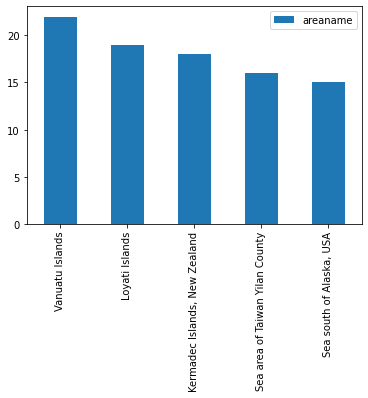

In [383]:
df2 = pd.DataFrame(df['areaname'].value_counts().head(5))
df2.plot.bar()
plt.show()

We can easily know that ‘Vanuatu Islands’ has the most frequent earthquake.

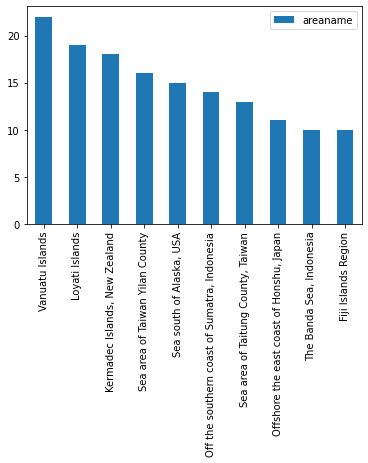

In [376]:
df2 = pd.DataFrame(df['areaname'].value_counts().head(10))
df2.plot.bar()
plt.show()

### 5.2.	What is the grade of most of the recent earthquakes?
df2 = pd.DataFrame(df['grade'].value_counts().head(10))
df2.plot.bar()
plt.show()


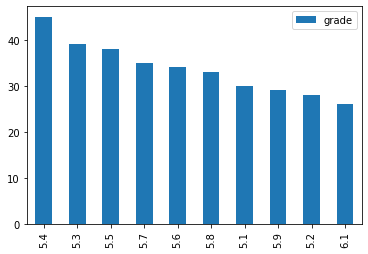

In [358]:
df2 = pd.DataFrame(df['grade'].value_counts().head(10))
df2.plot.bar()
plt.show()

Obviously, most of the earthquake’s grade is under 6 and 5.4 appeared most time in the recent earthquake so we don’t worry too much about it.


### 5.3.	What is the depth of most earthquakes recently?
df2 = pd.DataFrame(df['depth'].value_counts().head(10))
df2.plot.bar()
plt.show()

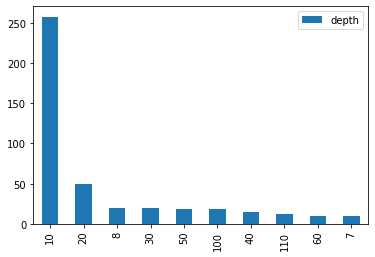

In [359]:
df2 = pd.DataFrame(df['depth'].value_counts().head(10))
df2.plot.bar()
plt.show()

We can know that most earthquakes are only 10 depth. It’s not a big influence on people.

# 6.	Conclusion
For recent earthquakes from 2021-03-06 21:12:05 to 2020-03-14 18:01:17, there are so many earthquakes across the world. But the good news is that all of the earthquake’s grade is under 7. Most of the earthquakes have small grades and depth so they didn’t have a large influence on people’s life. And it is reasonable that we didn’t see the news about the earthquake recently.
